In [1]:
import os
import sys

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

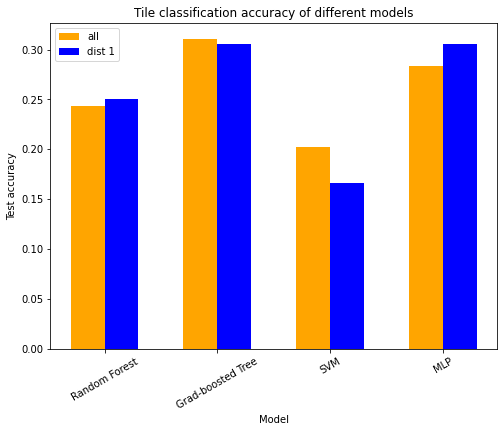

In [2]:
all_data = [0.24324324324324326, 0.3108108108108108, 0.20270270270270271, 0.28378378378378377]
all_data2 = [0.25, 0.3055555555555556, 0.16666666666666666, 0.3055555555555556]
models = ["Random Forest", "Grad-boosted Tree", "SVM", "MLP"]
X = np.arange(4)

width = 0.3
plt.figure(figsize=(8, 6))
plt.bar(X-width/2, all_data, width, color='orange', label = 'all')
plt.bar(X+width/2, all_data2, width, color='b', label = 'dist 1')
plt.ylabel('Test accuracy')
plt.xlabel('Model')
plt.title('Tile classification accuracy of different models')
plt.xticks(X, models, rotation=30)
plt.legend()

plt.show()

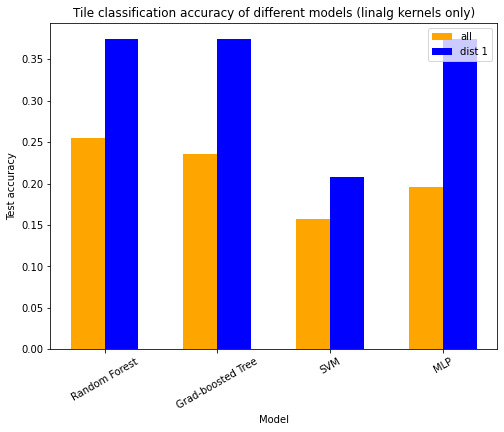

In [3]:
all_data = [0.2549019607843137, 0.23529411764705882, 0.1568627450980392, 0.19607843137254902]
all_data2 = [0.375, 0.375, 0.20833333333333334, 0.375]
models = ["Random Forest", "Grad-boosted Tree", "SVM", "MLP"]
X = np.arange(4)

width = 0.3
plt.figure(figsize=(8, 6))
plt.bar(X-width/2, all_data, width, color='orange', label = 'all')
plt.bar(X+width/2, all_data2, width, color='b', label = 'dist 1')
plt.ylabel('Test accuracy')
plt.xlabel('Model')
plt.title('Tile classification accuracy of different models (linalg kernels only)')
plt.xticks(X, models, rotation=30)
plt.legend()

plt.show()

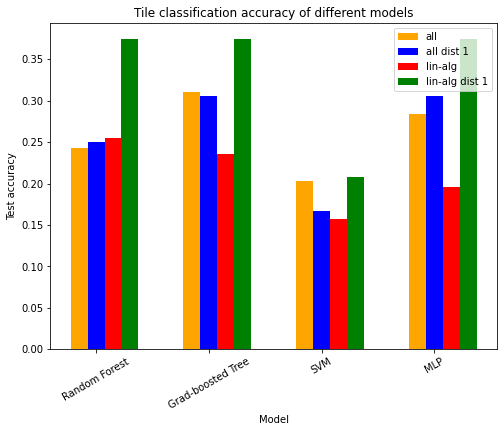

In [4]:
all_data = [0.24324324324324326, 0.3108108108108108, 0.20270270270270271, 0.28378378378378377]
all_data_dist_1 = [0.25, 0.3055555555555556, 0.16666666666666666, 0.3055555555555556]
lin_alg = [0.2549019607843137, 0.23529411764705882, 0.1568627450980392, 0.19607843137254902]
lin_alg_dist_1 = [0.375, 0.375, 0.20833333333333334, 0.375]
models = ["Random Forest", "Grad-boosted Tree", "SVM", "MLP"]
X = np.arange(4)

width = 0.15
plt.figure(figsize=(8, 6))
plt.bar(X-width, all_data, width, color='orange', label = 'all')
plt.bar(X, all_data_dist_1, width, color='b', label = 'all dist 1')
plt.bar(X+width, lin_alg, width, color='r', label = 'lin-alg')
plt.bar(X+width*2, lin_alg_dist_1, width, color='g', label = 'lin-alg dist 1')
plt.ylabel('Test accuracy')
plt.xlabel('Model')
plt.title('Tile classification accuracy of different models')
plt.xticks(X, models, rotation=30)
plt.legend()

plt.show()

In [5]:
def load_model_from_file(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)
    
model = load_model_from_file("../models/mlp.pkl")

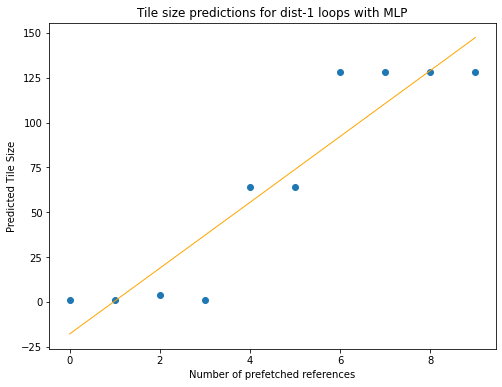

In [6]:
input = pd.DataFrame({'readInvariant': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'readPrefetched': [0, 1, 1, 2, 2, 2, 3, 4, 4, 5],
                      'readNonPrefetched': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'writeInvariant': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'writePrefetched': [0, 0, 1, 1, 2, 3, 3, 3, 4, 4],
                      'writeNonPrefetched': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'distToDominatingLoop': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

prediction = model.predict(input)
X = np.array(input['readPrefetched']) + np.array(input['writePrefetched'])

plt.figure(figsize=(8, 6))
plt.scatter(X, prediction)

fit_line = np.poly1d(np.polyfit(X, prediction, 2))
plt.plot(X, fit_line(X), 'orange', linewidth=1)
plt.ylabel('Predicted Tile Size')
plt.xlabel('Number of prefetched references')
plt.title('Tile size predictions for dist-1 loops with MLP')
plt.show()